In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


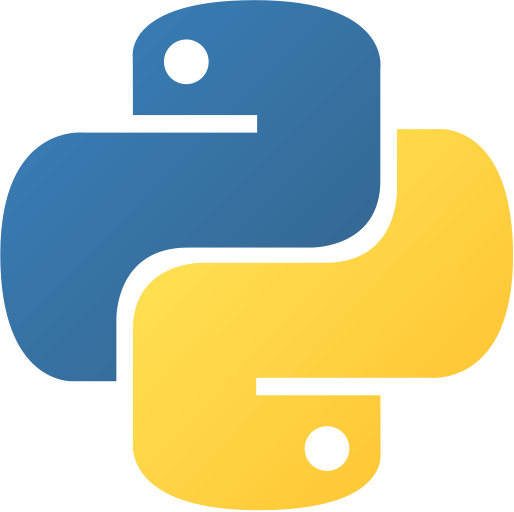
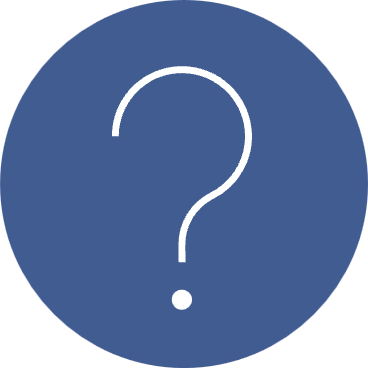
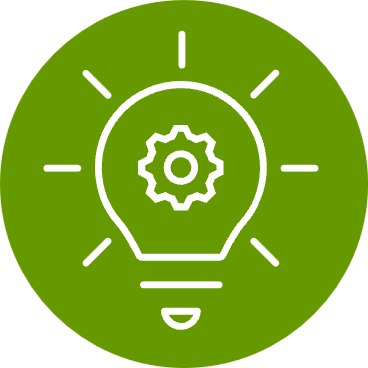
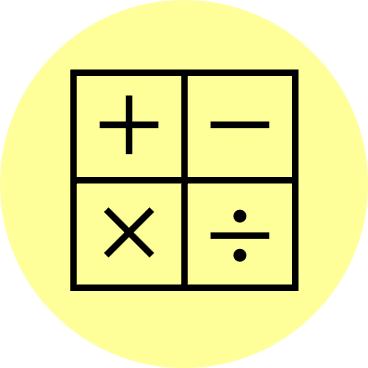

In [1]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """

   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)

_set_css_style('styles.css')

# Inhalt

<a href=#bookmark1> Folie 6: Recap Lineare Regression</a><br></br>
<a href=#bookmark2> Folie 8: Lineare Regression auf nur 2 Datenpunkten</a>
<BLOCKQUOTE><a href=#bookmark5> Zusatz zur Verdeutlichung der Modellvarianz</a></BLOCKQUOTE>
<a href=#bookmark3> Folie 16: Ridge Regression</a>
<BLOCKQUOTE><a href=#bookmark6> Fortsetzung Zusatz zur Verdeutlichung der Varianzreduktion durch Ridge Regression</a></BLOCKQUOTE>
<a href=#bookmark4> Folie 17: Ridge Regression, Lasso Regression & Elastic Net</a><br></br>

## Folie 6: Recap Lineare Regression <a name='bookmark1' />

Untersuchung des linearen Zusammenhangs einer abhängigen Variable $y$ und einer (**univariat**) oder mehrerer (**multivariat**) unabhängiger Variablen $x_j$.     
<div class="fancy-box formel">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
    $$ y(x) = w_0 + w_1 x_1 + ... + w_p x_p = w_0 + \sum_{j=1}^p w_j x_j $$.
</div>
<div class="fancy-box__img"></div>
</div>

<div class="fancy-box python">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
    Im folgenden Code wird beispielhaft der Zusammenhang zwischen Berufserfahrung in Jahren und Gehalt in tEUR geschätzt. Die Daten sind künstlich erzeugt. <br/><br/>
    Die Parameter der Geradengleichung $y(x) = w_0 + w_1 x_1 $ werden nach der Methode der kleinsten Quadrate so gewählt, dass die Summe der quadratischen Abweichungen der Datenpunkte zur Geraden minimal wird. 
</div>
<div class="fancy-box__img"></div>
</div>

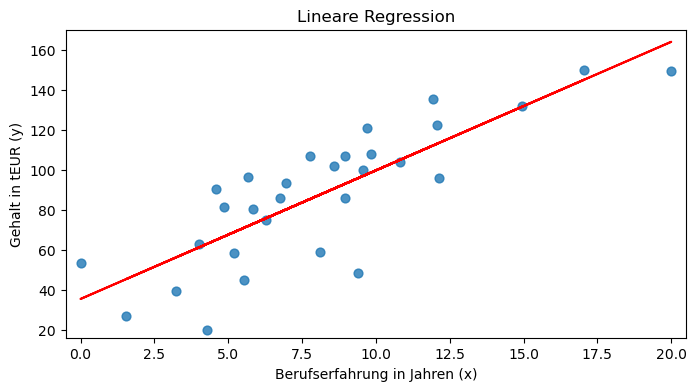

+--------------------+-----+
|  Geradengleichung  | MqA |
+--------------------+-----+
| y(x) = 35.4 + 6.4x | 369 |
+--------------------+-----+


In [2]:
# Import der benötigten Python Pakete 
from sklearn.datasets import make_regression # zur Generierung der Daten
from sklearn.linear_model import LinearRegression # zur Durchführung der linearen Regression
from prettytable import PrettyTable # zur Ausgabe der Ergebnisse
import numpy as np #zur Nutzung einiger nützlicher Funktionen
import matplotlib.pyplot as plt #zur Visualisierung

# Generiert ein zufälliges Regressionsproblem
X, y = make_regression(n_samples = 30, n_features = 1, random_state=2, noise=30)

# Skaliert abhängige Variable x (Berufserfahrung in Jahren) zwischen 0 - 20
X = np.interp(X, (X.min(), X.max()), (0, 20))

# Skaliert abhängige Variable y (Gehalt) zwischen 20,000..150,000 
y = np.interp(y, (y.min(), y.max()), (20, 150))

# Hier findet das Modelltraining statt
# Die Parameter w_0 und w_1 für die Regressionsgerade werden gemäß der Methode der kleinsten Quadrate so gewählt, 
# dass die Summe der quadratischen Abweichungen der Datenpunkte zur Geraden minimal wird
linreg = LinearRegression().fit(X, y)

# Visualisierung der Regressionsgeraden und der Datenpunkte
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(16, 170)

plt.scatter(X, y, marker= 'o', s=40, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')

plt.title('Lineare Regression')
plt.xlabel('Berufserfahrung in Jahren (x)')
plt.ylabel('Gehalt in tEUR (y)')
plt.show()



t = PrettyTable(['Geradengleichung', 'MqA'])
mqa = round(np.mean((linreg.predict(X) - y) ** 2))
equ = 'y(x) = '+str(round(linreg.intercept_,1))+' + '+str(round(linreg.coef_[0],1))+'x'
t.add_row([equ, mqa])
print(t)

## Folie 8: Lineare Regression auf nur 2 Datenpunkten <a name='bookmark2' />

<div class="fancy-box question">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
Was wäre, wenn nur 2 Datenpunkte aus unserem Datensatz zur Schätzung zur Verfügung stehen würden (d.h. $n \approx p$)? 

</div>
<div class="fancy-box__img"></div>
</div>

<div class="fancy-box python">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
    Im folgenden Code werden 2 Beispiele erzeugt, indem aus dem zuvor generierten Datensatz für jedes Beispiel 2 Datenpunkte zufällig gezogen und eine lineare Regression durchgeführt wird. Dies simuliert den Fall, dass nur annähernd so viele Beobachtungen wie Attribute (hier: Berufserfahrung) zur Verfügung stehen. <br/><br/>
    Auch wenn das nicht dem hochdimensionalen Fall entspricht, so veranschaulicht es doch die Probleme, die mit hochdimensionalen Daten auftreten.
</div>
<div class="fancy-box__img"></div>
</div>



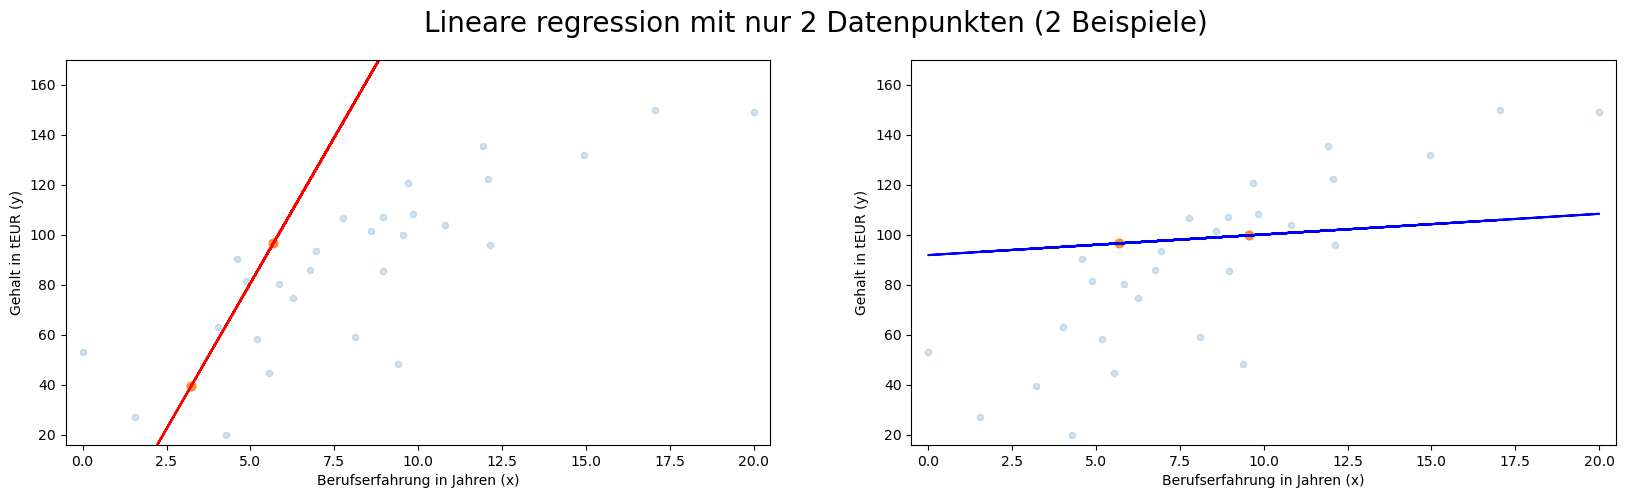

+-------+------------------+----------------+------------+
| Farbe | Geradengleichung | MqA (Training) | MqA (Test) |
+-------+------------------+----------------+------------+
|  red  |  -35.9 + 23.3 x  |       0        |   10731    |
|  blue |   91.8 + 0.8 x   |       0        |    1139    |
+-------+------------------+----------------+------------+


In [3]:
import random # zur Erzeugung von Zufallszahlen
line_color = ['red', 'blue']
# Festlegung des Seeds, um Ergebnisse reproduzieren zu können. Somit werden immer die selben Zufallszahlen gezogen 
random.seed(30) 
rand1 = random.randint(1, len(X)) # Ziehen der 1. ganzzahligen Zufallszahl
rand2 = random.randint(1, len(X)) # Ziehen der 2. ganzzahligen Zufallszahl
random.seed(25) 
rand3 = random.randint(1, len(X)) # Ziehen der 3. ganzzahligen Zufallszahl
 
point=[[rand1, rand2], [rand2, rand3]] #Das sind die Indizes der 4 Punkte, die für die beiden Beispiele gezogen werden 

t = PrettyTable(['Farbe','Geradengleichung', 'MqA (Training)', 'MqA (Test)']) #Definiere Table zur Ausgabe der Ergebnisse
fig, ax = plt.subplots(1,2,figsize=(20, 5)) # Generierung einer Bildinstanz

#Ein Foor Loop für jedes der beiden Beispiele
for i in range(len(fig.get_axes())):
    X_example = np.concatenate((np.array([X[point[i][0]]]), np.array([X[point[i][1]]])),axis = 0) # 2 Datenpunkte x-Werte
    y_example = np.concatenate((np.array([y[point[i][0]]]), np.array([y[point[i][1]]])),axis = 0) # 2 Datenpunkte y-Werte
    
    # Durchführung der linearen Regression (Modelltraining)
    linreg = LinearRegression().fit(X_example, y_example) 
    
    #Visualisierung der Ergebnisse
    ax[i].scatter(X, y, marker= 'o', s=20, alpha=0.2)
    ax[i].scatter(X_example, y_example, marker= 'o', s=40, alpha=0.8)
    ax[i].plot(X, linreg.coef_ * X + linreg.intercept_, c = line_color[i])
    ax[i].set_xlabel('Berufserfahrung in Jahren (x)')
    ax[i].set_ylabel('Gehalt in tEUR (y)')
    ax[i].set_xlim(-0.5, 20.5)
    ax[i].set_ylim(16, 170)
    
    #Berechnung der Mittleren quadratischen Abweichungen für Trainingsdaten und Testdaten
    mqa_train = round(np.mean((linreg.predict(X_example) - y_example) ** 2))
    mqa_test = round(np.mean((linreg.predict(np.delete(X, point[i], axis=0)) - np.delete(y, point[i], axis=0)) ** 2))
    
    #Bestimmung der Geradengleichung
    if round(linreg.coef_[0]) > 0:
        equ = str(round(linreg.intercept_,1))+' + '+str(abs(round(linreg.coef_[0],1)))+' x'     
    else:
        equ = str(round(linreg.intercept_,1))+' - '+str(abs(round(linreg.coef_[0],1)))+' x' 
        
    t.add_row([line_color[i], equ, mqa_train, mqa_test])

fig.suptitle('Lineare regression mit nur 2 Datenpunkten (2 Beispiele)',fontsize = 20)

plt.show()
print(t)

### Zusatz zur Verdeutlichung der Modellvarianz (nicht in Foliensatz) <a name='bookmark5' />
<div class="fancy-box python">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
    Der folgende Code visualisiert noch einmal die hohe Varianz und das Overfitting, wenn das lineare Regressionsmodell nur
    auf 2 Datenpunkten geschätzt wird.
</div>
<div class="fancy-box__img"></div>
</div>

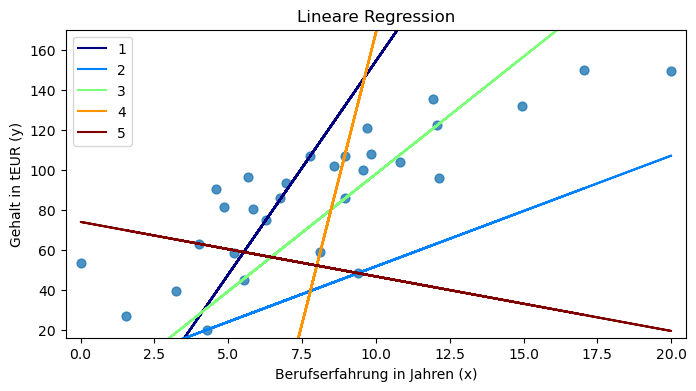

+--------+------------------+----------------+------------+
| Nummer | Geradengleichung | MqA (Training) | MqA (Test) |
+--------+------------------+----------------+------------+
|   1    |  -59.1 + 21.3 x  |       0        |    5575    |
|   2    |   -3.7 + 5.5 x   |       0        |    2716    |
|   3    |  -19.4 + 11.7 x  |       0        |    1092    |
|   4    | -413.3 + 58.2 x  |       0        |   54009    |
|   5    |   73.9 - 2.7 x   |       0        |    3447    |
+--------+------------------+----------------+------------+


In [4]:
from sklearn.model_selection import train_test_split #zur Aufteilung des Datensatzes in Trainings- und Testdaten
from matplotlib.pyplot import cm #Für Farbcodierung der Geraden



 
#Festlegung, wie viele Regressionen auf zwei zufällig gezogenen Datenpunkten aus unserem Datensatze durchgeführt werden
number_examples = 5

# Instanziierung der linearen Regression
linreg = LinearRegression()

def regression_analysis(number_examples, model, title):
    
    #Definiere Tabelle zur Ausgabe der Ergebnisse
    t = PrettyTable(['Nummer', 'Geradengleichung', 'MqA (Training)', 'MqA (Test)']) 
    
    color = color = [ cm.jet(x) for x in np.linspace(0, 1, number_examples) ]# Definition der Linienfarbe im Graph
    #Definition des Graphen
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    ax.set_xlim(-0.5, 20.5)
    ax.set_ylim(16, 170)
    #In jedem Schleifendurchlauf wird eine Regression auf 2 zufälligen Punkten aus dem Datensatz durchgeführt
    #und visualisiert
    for i in range(number_examples):

        # Aufteilung des Datensets in Trainings- und Testdaten, sodass jeweils 2 Datenpunkte zum Training verwendet werden
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i+15, test_size = 0.93)

        # Durchführung der linearen Regression (Modelltraining)
        model = model.fit(X_train, y_train) 

        # Visualisierung der Regressionsgerade
        plt.plot(X, model.coef_ * X + model.intercept_, c = color[i], label="{}".format(i+1))

        # Berechnung des Trainings- und Testfehlers
        mqa_train = round(np.mean((model.predict(X_train) - y_train) ** 2))
        mqa_test = round(np.mean((model.predict(X_test) - y_test) ** 2))

        # Aufstellen der Gleichung für die Regressionsgerade
        if round(model.coef_[0]) > 0:
            equ = str(round(model.intercept_,1))+' + '+str(abs(round(model.coef_[0],1)))+' x'     
        else:
            equ = str(round(model.intercept_,1))+' - '+str(abs(round(model.coef_[0],1)))+' x' 

        # Schreiben der Ergebnisse in die Tabelle zur Ausgabe
        t.add_row([str(i+1), equ, mqa_train, mqa_test])


    # Visualisierung der Datenpunkte, Beschriftung der Achsen und Ausgabe der Ergebnisse
    plt.scatter(X, y, marker= 'o', s=40, alpha=0.8)
    plt.title(title)
    plt.xlabel('Berufserfahrung in Jahren (x)')
    plt.ylabel('Gehalt in tEUR (y)')    
    plt.legend()
    plt.show()
    print(t)
    
regression_analysis(number_examples = number_examples, model = linreg, title = 'Lineare Regression')

<div class="fancy-box definition">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
Der Trainingsfehler der 5 linearen Regressionsschätzungen ist aufgrund des Overfittings immer 0 (MqA (Training)). Der Testfehler ist allerdings sehr hoch. Auch die hohe Varianz wird deutlich, da eine Änderung des Trainingsdatensatzes großen Einfluss auf das geschätzte Modell hat.
</div>
<div class="fancy-box__img"></div>
</div>

## Folie 16: Ridge Regression <a name='bookmark3' />

<div class="fancy-box formel">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
Kostenfunktion mit Penalty-Term bei der Ridge Regression
    \begin{equation} \sum_{i=1}^n(y_i-w_0-\sum_{j=1}^p w_{ij})^2+\lambda\sum_{j=1}^p w_j^2\end{equation}
</div>
<div class="fancy-box__img"></div>
</div>

<img src="Lin_Reg.png" style="width: 400px; padding: 30px" img align="right">
<br/>
<br/>

<div class="fancy-box python">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
    Im folgenden Code wird eine Ridge Regression auf den 2 Datenpunkten aus unserem oberen Beispiel (s. Graph rechts) 
    in Abhängigkeit von dem Tuning Parameter $\lambda$ geschätzt.<br/><br/>
    Spielen Sie gerne mit den Werten für $\lambda$ (Zeile 12), um die Auswirkungen auf das Ergebnis zu sehen!
</div>
<div class="fancy-box__img"></div>
</div>


+--------+------------------+----------------+------------+---------+
| lambda | Geradengleichung | MqA (Training) | MqA (Test) | Penalty |
+--------+------------------+----------------+------------+---------+
|   0    |  -35.9 + 23.3 x  |       0        |   10731    |   0.0   |
|   1    |  -10.0 + 17.5 x  |       51       |    4961    |   17.5  |
|   10   |   43.9 + 5.4 x   |      483       |    382     |   54.0  |
|  100   |   64.9 + 0.7 x   |      770       |    1314    |   70.0  |
| 100000 |   68.0 - 0.0 x   |      817       |    1574    |   0.0   |
+--------+------------------+----------------+------------+---------+


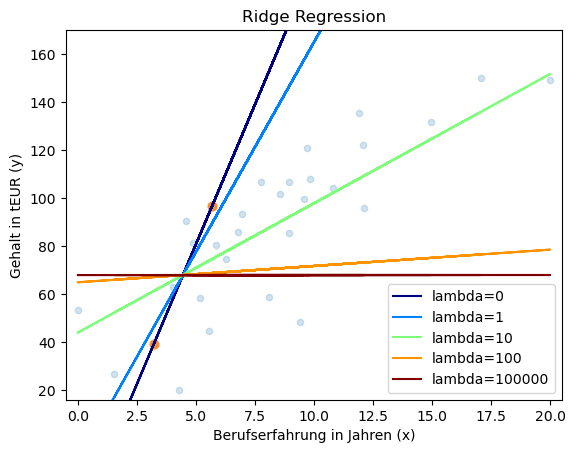

In [5]:
from sklearn.linear_model import Ridge # zur Durchführung der Ridge Regression

#Definiere Tabelle zur Ausgabe der Ergebnisse
t = PrettyTable(['lambda', 'Geradengleichung', 'MqA (Training)', 'MqA (Test)', 'Penalty'])

#Das sind die 2 Datenpunkte aus unserem oberen Beispiel
X_example = np.concatenate((np.array([X[point[0][0]]]), np.array([X[point[0][1]]])),axis = 0) # 2 Datenpunkte x-Werte
y_example = np.concatenate((np.array([y[point[0][0]]]), np.array([y[point[0][1]]])),axis = 0) # 2 Datenpunkte y-Werte

# Verändern Sie die Werte und schauen Sie sich die Auswirkungen an
lambdas = [0,1,10,100, 100000] 


color = [ cm.jet(x) for x in np.linspace(0, 1, len(lambdas)) ] # Definition der Linienfarbe im Graph

#Definition des Graphen
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(16, 170)

#In jedem Schleifendurchlauf wird die Ridge Regression auf den 2 Datenpunkten aus unserem Beispiel mit verschiedenen
#Werten für lambda durchgeführt und visualisiert

for i in range(len(lambdas)):
    
    # Durchführung der Ridge Regression (Modelltraining) auf den 2 Datenpunkten mit Wert lambda
    linridge = Ridge(alpha=lambdas[i]).fit(X_example, y_example)   
    
    # Visualisierung der Regressionsgerade
    plt.plot(X, linridge.coef_ * X + linridge.intercept_, c = color[i], label="lambda={}".format(lambdas[i]))
    
    # Berechnung des Trainings- und Testfehlers
    mqa_train = round(np.mean((linridge.predict(X_example) - y_example) ** 2))
    mqa_test = round(np.mean((linridge.predict(np.delete(X, [rand1, rand2], axis=0)) - np.delete(y, [rand1, rand2], axis=0)) ** 2))
    
    # Berechnung des Penalty Terms
    penalty = sum(np.round(linridge.coef_,1)*lambdas[i])
    
    # Aufstellen der Gleichung für die Regressionsgerade
    if round(linridge.coef_[0]) > 0:
        equ = str(round(linridge.intercept_,1))+' + '+str(abs(round(linridge.coef_[0],1)))+' x'     
    else:
        equ = str(round(linridge.intercept_,1))+' - '+str(abs(round(linridge.coef_[0],1)))+' x' 
    
    # Schreiben der Ergebnisse in die Tabelle zur Ausgabe
    t.add_row([lambdas[i], equ, mqa_train, mqa_test, penalty])
    
# Visualisierung der Datenpunkte, Beschriftung der Achsen und Ausgabe der Ergebnisse   
plt.scatter(X, y, marker= 'o', s=20, alpha=0.2)
plt.scatter(X_example, y_example, marker= 'o', s=40, alpha=0.8)
plt.title('Ridge Regression')
plt.xlabel('Berufserfahrung in Jahren (x)')
plt.ylabel('Gehalt in tEUR (y)')
plt.legend()
print(t)
plt.show()


### Fortsetzung Zusatz zur Verdeutlichung der Varianzreduktion durch Ridge Regression (nicht in Foliensatz) <a name='bookmark6' />
<img src="Ridge.png" style="width: 550px; padding: 30px" img align="right">
<br/>
<br/>
<br/>
<br/>
<br/>
<div class="fancy-box python">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
    Aus unsere 5 zufällig generierten Regressionsprobleme mit jeweils 2 Datenpunkte aus unserem Datensatz wenden wir im folgenden die Ridge Regression an.<br/><br/>
    Achten Sie dabei darauf, was mit den Geraden passiert und wie sich der Trainings- und Testfehler ändert.
</div>
<div class="fancy-box__img"></div>
</div>

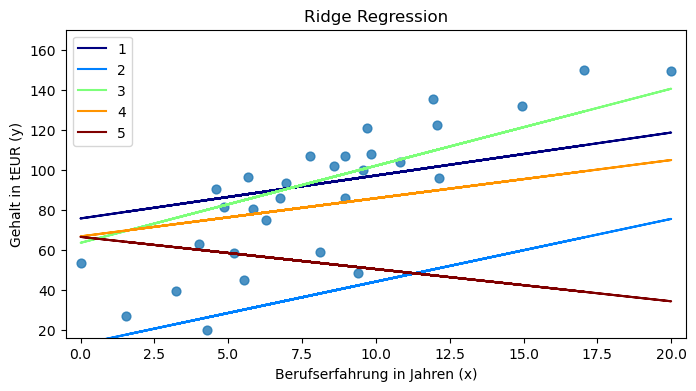

+--------+------------------+----------------+------------+
| Nummer | Geradengleichung | MqA (Training) | MqA (Test) |
+--------+------------------+----------------+------------+
|   1    |   75.7 + 2.1 x   |      206       |    773     |
|   2    |   12.7 + 3.1 x   |       38       |    3235    |
|   3    |   63.5 + 3.9 x   |      152       |    569     |
|   4    |   66.7 + 1.9 x   |      537       |    793     |
|   5    |   66.4 - 1.6 x   |       9        |    2945    |
+--------+------------------+----------------+------------+


In [6]:
from sklearn.model_selection import train_test_split #zur Aufteilung des Datensatzes in Trainings- und Testdaten
from matplotlib.pyplot import cm #Für Farbcodierung der Geraden


#Definiere Tabelle zur Ausgabe der Ergebnisse
t = PrettyTable(['Nummer', 'Geradengleichung', 'MqA (Training)', 'MqA (Test)']) 
# Instanziierung der linearen Regression
linridge = Ridge(alpha = 10)

regression_analysis(number_examples = number_examples, model = linridge, title = 'Ridge Regression')

<div class="fancy-box definition">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
Besonders die Geraden 1, 3 und 5 passen deutlich besser zu unserm Datensatz als mit der normalen linearen Regression. Der Trainngsfehler ist größer geworden wohingegen der Testfehler abgenommen hat. Der Parameter $w_1$ ist durch den Penalty Term "geschrumpft" und die Varianz hat abgenommen.<br/><br/>
    <b>Aber Achtung</b>, nicht in allen Fällen liefert die Ridge Regression ein besseres Ergebnis (s. Gerade 2)
</div>
<div class="fancy-box__img"></div>
</div>

## Folie 17: Ridge Regression, Lasso Regression & Elastic Net <a name='bookmark4' />


<div class="fancy-box formel">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
Penalty-Term für die Ridge Regression (L<sub>2</sub>-Norm)
    \begin{equation} \lambda\sum_{j=1}^p w_j^2\end{equation}
Penalty-Term für die Lasso Regression (L<sub>1</sub>-Norm)
    \begin{equation} \lambda\sum_{j=1}^p |w_j|\end{equation}
Penalty-Term für das Elastic Net
    \begin{equation} \lambda_1\sum_{j=1}^p |w_j|+\lambda_2\sum_{j=1}^p w_j^2\end{equation}
</div>
<div class="fancy-box__img"></div>
</div>

<div class="fancy-box python">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
    Im folgenden Code wird der Parameter $w$ als Funktion des Tuning Parameters $\lambda$ für die Ridge Regression, Lasso Regression und das Elastic Net dargestellt.<br/><br/>
    Im unteren Graph ist die Skalierung der Abszisse geändert, sodass Sie den Bereich, in dem die Lasso Regression und das Elastic Net einen "Knick" verursachen, genauer betrachten können.
</div>
<div class="fancy-box__img"></div>
</div>

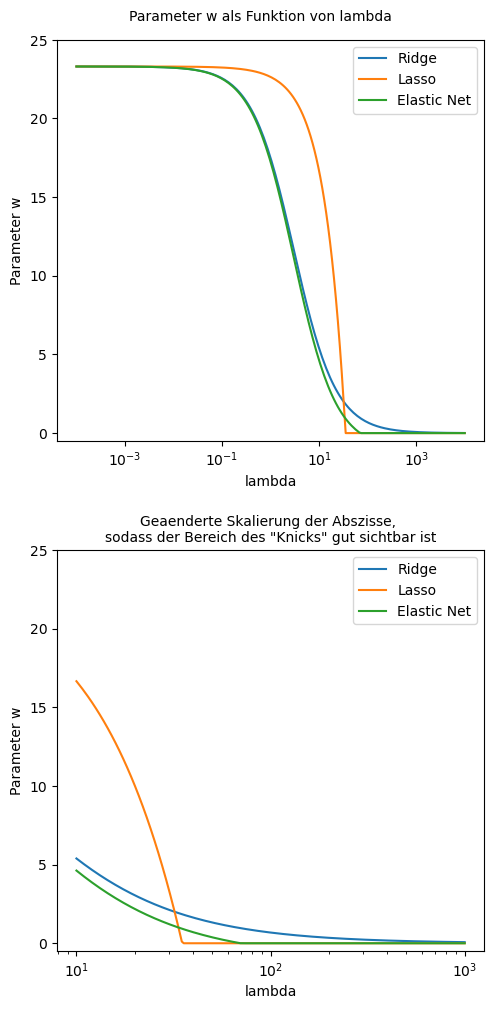

In [7]:
from sklearn.linear_model import Lasso # zur Durchführung der Ridge Regression
from sklearn.linear_model import ElasticNet # zur Durchführung der Ridge Regression


fig, ax = plt.subplots(2,1,figsize=(5, 10))
fig.tight_layout(h_pad=6)
n_alphas = 200

alphas = np.array([np.logspace(-4, 4, n_alphas), np.logspace(1, 3, n_alphas)])
for i in range(len(alphas)):
    
    coefs_r = []
    coefs_l = []
    coefs_e = []
    for a in alphas[i]:
        ridge = Ridge(alpha=a)
        ridge.fit(X_example, y_example)
        coefs_r.append(ridge.coef_)

        lasso = Lasso(alpha=a)
        lasso.fit(X_example, y_example)
        coefs_l.append(lasso.coef_)

        elasticNet = ElasticNet(alpha=a, l1_ratio=0.5)
        elasticNet.fit(X_example, y_example)
        coefs_e.append(elasticNet.coef_)

    coefs = np.concatenate(([coefs_r, coefs_l, coefs_e]),axis = 1)

    ax[i].plot(alphas[i], coefs)
    ax[i].set_xscale("log")
    ax[i].legend(['Ridge', 'Lasso', 'Elastic Net'])
    ax[i].set_xlabel('lambda')
    ax[i].set_ylabel('Parameter w')
    ax[i].set_ylim(-0.5, 25)
    
ax[1].set_title('Geaenderte Skalierung der Abszisse, \nsodass der Bereich des "Knicks" gut sichtbar ist', fontsize = 10)
fig.suptitle("Parameter w als Funktion von lambda",fontsize = 10) 
plt.subplots_adjust(top=0.95)
plt.show()


<div class="fancy-box definition">
<div class="fancy-box__img"></div>
<div class="fancy-box__text">
Die Lasso Regression und das Elastic Net (Kombination von Lasso Regression und Ridge Regression) können zur Feature Selection genutzt werden, da hierbei Parameter null werden können.
</div>
<div class="fancy-box__img"></div>
</div>